# REAL ESTATE PRICES FORECAST - ZILLOW

Name: Julie chepngeno

course: DS fulltime

# TIME SERIES PROJECT

<img src="image.jpg" />

## Introduction
### Overview

In the dynamic world of real estate investment, making informed decisions is paramount to success. In 2021, USA's real estate industry boasted a staggering valuation of USD 3.69 trillion. Forecasts projected a promising future, with an estimated compound annual growth rate of 5.2% anticipated between 2022 and 2030. This projected growth, coupled with the rising population rates, presents an immensely lucrative opportunity for real estate investors to capitalize on substantial profits.

This project dives into the realm of time series modeling, using data sourced from [Zillow Research](https://www.zillow.com/research/data/), a renowned real estate data provider, and the main focus is to leverage time series modeling techniques to forecast real estate prices for the top 5 best zip codes to invest in. It offers well-thought-out and insightful recommendations which will guide the firm's decisions which will go a long way in mitigating risks associated with each investment based on some factors like market volatility. A market analysis is conducted to identify areas of high demand and growth for optimal investment and prioritize investments with the potential substantial returns based on factors like property appreciation and market demand.

### Problem Statement

*"What are the top 5 best locations to invest in ?"*

This seemingly straightforward question, however, it's actually quite tricky and has many important details that need to be thought about very carefully. The choice of where to invest in should not be based solely on profit margins; it must encompass a holistic understanding of various factors, including risk, market trends, and investment horizons. Specifically the aim is to identify the top five locations that offer the highest Return on Investment (ROI) potential by conducting an analysis of various factor including past price trends, growth rates, market demand, and other relevant indicators.

### Objectives

**main objective:**

- Develop a forecasting model that can accurately predict real estate price movements in different areas and assist in identifying the most favorable locations for investment between the period of April 1996 to April 2018.

**specific objectives:**

- Evaluate Return on Investment (RoI).
- Identify underlying patterns, trends, and seasonality in the real estate price data.
- Build a time series predictive model that can forecast real estate prices.
- Evaluate the forecasting model's performance by comparing its predictions against actual real estate prices.
- forecast house prices in the next subsequent years.

### Success Metrics

In this project, to determine the best model for our analysis three important metrics will be considered: **AIC (Akaike Information Criterion)**, **BIC (Bayesian Information Criterion)**,  **Mean Absolute Percentage Error (MAPE)**, **RMSE (Root Mean Square Error)**. These metrics will allow us to assess the goodness of fit and predictive performance of different models.

## Data Understanding

The dataset used in this project consists of historic median house prices from various regions in the USA. It covers a time period of 22 years, specifically from April 1996 to April 2018. The dataset was obtained from the [Zillow website](https://www.zillow.com/research/data/).

The dataset has a total of 14,723 rows and 272 columns. Four columns are categorical while the rest are numerical.

More details about the  columns are described as below:

- ``RegionID:`` A unique identifier for each region.

- ``RegionName:`` The names of the regions, represented by zip codes.

- ``City:`` The corresponding city names for each region.

- ``State:`` The names of the states where the regions are located.

- ``Metro:`` The names of the metropolitan areas associated with the regions.

- ``County Name:`` The names of the counties where the regions are situated.

- ``Size Rank:`` The ranking of the zip codes based on urbanization.

- ``Date Columns (265 Columns):`` These columns represent median house prices for each region over the years.

## Data Preparation

In [191]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import itertools
import pmdarima as pm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
%matplotlib inline

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
# Displaying all columns
pd.set_option("display.max_columns", None)

plt.style.use("fivethirtyeight")

In [192]:
# Previewing the dataset
df = pd.read_csv("zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [193]:
# a class to describe the datasetfor data understanding
class Describer:
    def __init__(self, data):
        self.data = data
    # checking the shape of the data
    def shape(self):
        return print(f"The dataset has {self.data.shape[0]} entries and {self.data.shape[1]} columns")
    # getting summary data information
    def get_info(self):
        return self.data.info()
    # checking for columns
    def columns(self):
        return self.data.columns
    # checking for missing values
    def missing(self):
        missing_vals = self.data.isna().sum().sum()
        total_cells = self.data.size
        percent_missing = (missing_vals / total_cells)
        return print(f"The dataset has {missing_vals} missing values.\n"
                     f"This totals to {percent_missing:.2%} of the entire dataset.")
    # Exploring the dataframe for the columns with null values
    def missing_data(self):
        missing_data = self.data.isna().sum()
        missing_data = missing_data[missing_data > 0]
        return missing_data.to_frame().T
    def duplicates(self):
        return print(f"The dataset has {self.data.duplicated().sum()} duplicates")

In [194]:
# instantiating
du = Describer(df)

# data information
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [195]:
# data columns
du.columns()

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

- To actually learn from the data we'll need to reshape the dataset to long format so that the dates which are as the columns can be on one column i.e date column.

In [196]:
# shape of the data
du.shape()

The dataset has 14723 entries and 272 columns


In [197]:
# duplicates
du.duplicates()

The dataset has 0 duplicates


To ensure the development of a robust and accurate model, several data cleaning techniques will be applied to the dataset. The following techniques will be employed:

1. ``Completeness`` - Making sure that all data fields are with values and that there are no null values.

2. ``Consistency`` - Values should be free from contradiction and to identify any discrepancies or irregularities.
3. ``Validity`` - verifying that the values within each variable align with expected ranges or predefined criteria making sure that the data is accurate and relevant.
4. ``Uniformity`` - Inconsistent or non-uniform data can introduce errors and bias into the modeling process, leading to unreliable results. Robust techniques will be employed to detect and handle non-uniformity effectively, ensuring that the data is standardized and aligned.

This techniques will ensure reliability and accuracy of the data.

In [198]:
# Checking for missing values
du.missing()

The dataset has 157934 missing values.
This totals to 3.94% of the entire dataset.


In [199]:
# columns with missing data
du.missing_data()

,Metro,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
0,1043,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1038,1038,1038,1038,1038,1038,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,918,918,918,918,918,918,887,887,887,887,887,887,866,866,866,866,866,866,814,814,801,801,801,801,723,723,723,723,723,723,667,667,667,667,667,667,640,640,640,640,640,640,620,620,620,620,620,620,613,613,613,613,613,613,607,607,607,607,607,607,598,598,598,598,598,598,587,587,587,587,587,587,580,580,580,580,580,580,579,579,349,349,349,349,308,308,308,308,308,308,275,275,275,275,275,275,251,251,251,251,251,251,224,224,224,224,224,224,206,206,206,206,206,206,151,151,151,151,151,151,109,109,109,109,109,109,56,56,56,56,56,56


- The Metro column represents the names of the metropolitan areas associated with the regions and has 1043 missing values. Instead of dropping the null values we'll impute the null values with a "missing" category.

- There are also missing values in the date columns which represents the median house prices for each region which will be imputed through interpolation.

In [200]:
# imputing missing values in Metro column
df.Metro.fillna("Missing", inplace=True)

In [201]:
# imputing missing values in date columns through interpolation
df.interpolate(inplace=True)

In [202]:
# Confirming that there are no null values
du.missing()

The dataset has 0 missing values.
This totals to 0.00% of the entire dataset.


Next we'll make sure that the columns are in the datatypes that are intended to work with.

In [203]:
# Numeric columns
df.select_dtypes(include="number").columns

Index(['RegionID', 'RegionName', 'SizeRank', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=268)

In [204]:
# categorical columns
df.select_dtypes(exclude="number").columns

Index(['City', 'State', 'Metro', 'CountyName'], dtype='object')

- The RegionName represents the names of the regions, represented by zip codes. To avoid confusion we'll rename the column name to Zipcode in respective to the problem that we seek to answer on the top five locations to invest in.

- We also note that the RegionName column is of numeric type. This should be converted to a categorical datatype as this are location zipcode and don't have any numerical value. By converting it to object type, it ensures that the analysis and modeling processes treat it as a categorical feature, enabling meaningful interpretations and appropriate handling during data manipulation and modeling steps.

In [205]:
# renaming RegionName to ZipCode
df.rename(columns={"RegionName": "ZipCode"}, inplace=True)

In [206]:
# converting ZipCode to object type
df.ZipCode = df.ZipCode.astype("string")

In [207]:
# exploring Zipcode format
print(df.ZipCode.min())
print(df.ZipCode.max())

1001
99901


- For consistency in the representation of zipcodes, the column will be restructured to have all the digits as five in number. Some zip codes contain four digits, suggesting a missing zero at the beginning. Therefore, the column will be modified to include a leading zero for zipcodes with four digits, aligning them with the standard format of five-digit zip codes ensuring uniformity.

In [208]:
# restructuring to have all zipcodes as five in number
for i in range(len(df)):
    df.ZipCode[i] = df.ZipCode[i].rjust(5, "0")

In [209]:
# confirming Zipcode format
print(df.ZipCode.min())
print(df.ZipCode.max())

01001
99901


## Data Preprocessing

### Feature Engineering

We'll feature engineer two new columns: one for calculating the ``return on investment (ROI)`` and another for determining the ``coefficient of variation (CV)``.

- ``Return on Investment (ROI)`` is an approximate measure of an investment's profitability.

- ``coefficient of variation (CV)`` measures the extent of data point dispersion around the mean and indicates the ratio of standard deviation to the mean. This enables investors to evaluate the level of risk involved relative to the ROI and allows them to assess the risk-to-reward ratio before investing the money. A lower coefficient provides the optimum risk-to-reward ratio with high returns and lower risks.

In [210]:
# calculating ROI
df["ROI"] = (df["2018-04"] / df["1996-04"]) - 1

# calculating std for CV calculation
df["std"] = df.loc[:, "1996-04":"2018-04"].std(axis=1)

# calculating mean for CV calcultion
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(axis=1)

# calculating CV
df["CV"] = df['std']/df["mean"]

# dropping std and mean columns
df.drop(["std", "mean"], inplace=True, axis=1)

In [211]:
# Preview of zipcodes, ROI and CV
df[["ZipCode", "ROI", "CV"]].head()

,ZipCode,ROI,CV
0,60657,2.083782,0.256487
1,75070,0.365295,0.152680
2,77494,0.567966,0.143950
3,60614,1.623971,0.237364
4,79936,0.571798,0.178326


### Reshaping the data to Long Format

The data has been in the Wide Format, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found in. Since column names are metadata, our algorithms will miss out on what dates each value is for.

This means that before we pass this data to our time  series models, we'll need to reshape our dataset to Long Format. This transformation involves restructuring the dataframe to have a single column for the Date and another column for the corresponding values. The Date column will be set as the index to establish the temporal order of the data points.

In [212]:
# creaing a copy to reshape it to long view
long_df = df.copy()

In [213]:
# concerting wide format to long format
def melt_df(data):
    melted = pd.melt(data, id_vars=["RegionID", "ZipCode", "City", "State", "Metro", "CountyName",
                                    "SizeRank", "ROI", "CV"], var_name="Date")
    melted["Date"] = pd.to_datetime(melted["Date"], infer_datetime_format=True)
    melted = melted.dropna(subset=["value"])
    return melted

long_df = melt_df(long_df)

### Indexing Datetime

Working with time series data in Python, having dates (or datetimes) in the index can be very helpful, especially if they are of DatetimeIndex type as the index allows for intuitive and efficient time-based indexing and slicing operations. It enables easy access to specific time periods, such as a particular day, month, or year. Additionally, the DatetimeIndex provides convenient methods for resampling, time shifting, and frequency conversion.

In [214]:
# indexing the Date column
long_df.set_index("Date", inplace=True)

In [215]:
# Renaming Value column to median_houseprice for intuition
long_df.rename(columns={"value": "Median_HousePrice"}, inplace=True)

In [216]:
# Preview of cleaned data
long_df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,ROI,CV,Median_HousePrice
Date,,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,77300.0


## EDA

In this section we seek to answer various questions including top 5 Prerrable zipcodes to invest in, top 5 zipcodes with high ROI and more.

The distribution of the median house prices;

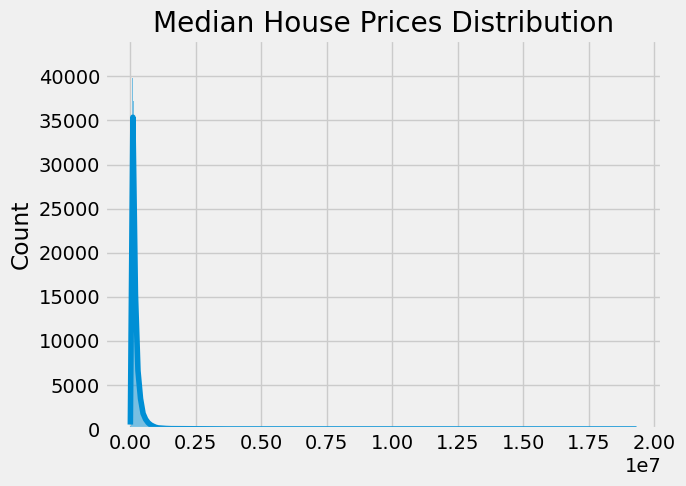

In [217]:
# Median_HousePrice Distribution
sns.histplot(np.array(long_df["Median_HousePrice"]), kde=True)
plt.title("Median House Prices Distribution");

- The distribution of median house prices is highly skewed to the right, as indicated by the long tail on the right side of the distribution. The majority of the values are concentrated around lower values, with a few extreme values on the higher end.


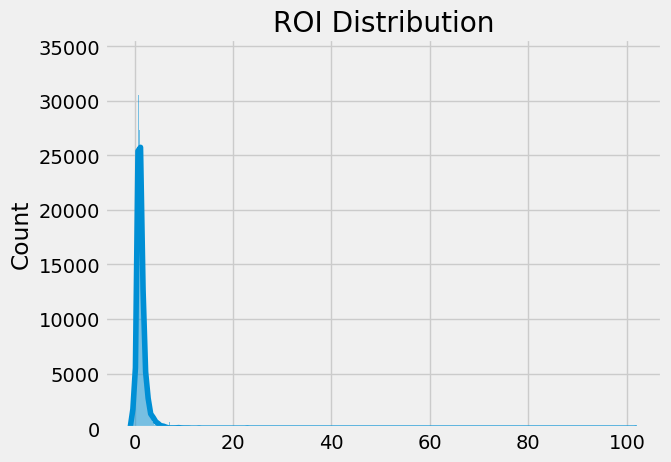

In [218]:
# ROI Distribution
sns.histplot(np.array(long_df["ROI"]), kde=True)
plt.title("ROI Distribution");

- This distribution is also highly skewed to the right. This suggests that most properties in the dataset have relatively lower returns, while a small number of properties have significantly higher returns. Most of the houses have an ROI between 1% and 2% 


 When making investment decisions balance your risk-return trade-off by considering both ROI (return potential) and CV (risk). Properties with a history of high ROI and low CV may be preferable.

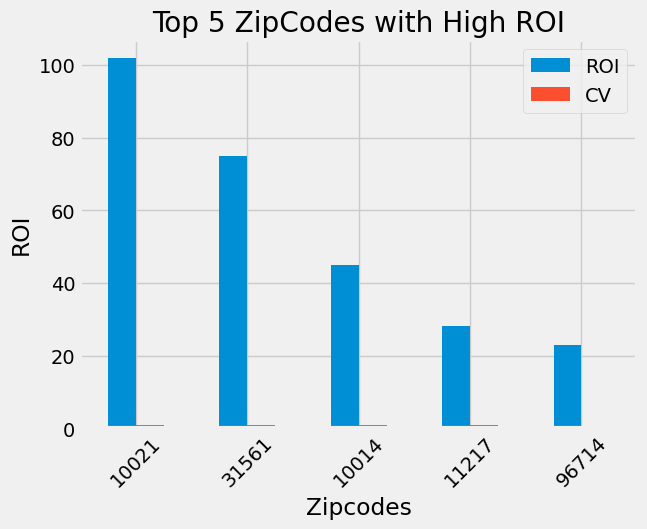

In [219]:
# A plot of top 5 preferrable zipcodes to invest in
long_df.groupby("ZipCode")[["ROI", "CV"]].mean().\
    sort_values(by=["ROI", "CV"], ascending=[False, True])[:5].\
    plot(kind="bar")
plt.xlabel("Zipcodes")
plt.ylabel("ROI")
plt.title("Top 5 ZipCodes with High ROI")
plt.xticks(rotation=45);

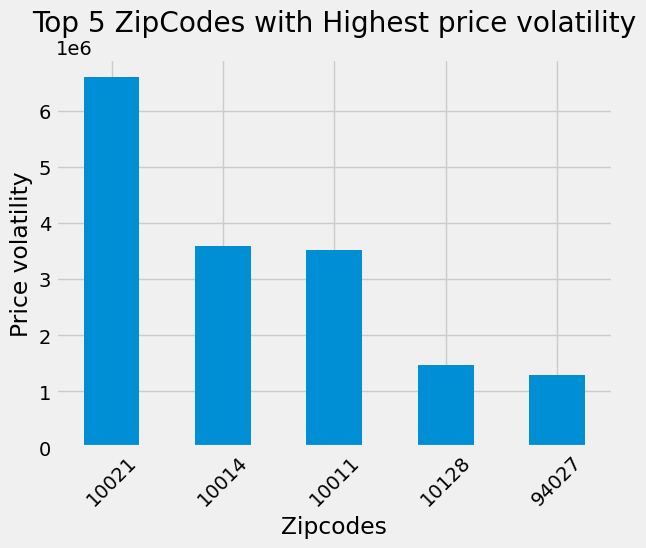

In [220]:
long_df.groupby("ZipCode")["Median_HousePrice"].std().\
    sort_values(ascending=False)[:5].plot(kind="bar")
plt.xlabel("Zipcodes")
plt.ylabel("Price volatility")
plt.title("Top 5 ZipCodes with Highest price volatility")
plt.xticks(rotation=45);

Our aim here is to look at the correlation of the numeric columns using pearson's coefficient

In [221]:
# correlation
long_df.select_dtypes(include="number").corr()

,RegionID,SizeRank,ROI,CV,Median_HousePrice
RegionID,1.000000,-0.086092,0.023343,0.042102,0.024458
SizeRank,-0.086092,1.000000,-0.085539,-0.051906,-0.132675
ROI,0.023343,-0.085539,1.000000,0.415642,0.465619
CV,0.042102,-0.051906,0.415642,1.000000,0.305319
Median_HousePrice,0.024458,-0.132675,0.465619,0.305319,1.000000


- RegionID has a correlation with ROI, CV, and median_houseprice, that is almost close to zero indicating that it has little to no effect on these variables.
- SizeRank has a weak negative correlation with ROI, CV, and median_houseprice, indicating that as the size rank increases, the ROI, CV, and median house price tend to decrease slightly.
- ROI has a weak positive correlation with CV and median_houseprice, indicating that as ROI increases, the CV and median house price tend to increase slightly.
- CV has a weak positive correlation with median_houseprice and ROI ,indicating that as the CV increases, the median house price and ROI tends to increase.

The Trend of the property prices over the years

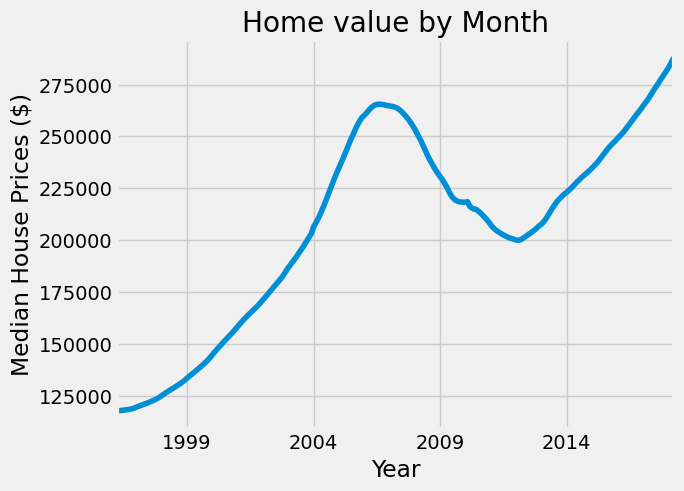

In [222]:
# Trend by month
long_df["Median_HousePrice"].resample("MS").mean().plot()
plt.xlabel("Year")
plt.ylabel("Median House Prices ($)")
plt.title("Home value by Month");

- The plot of the housing prices indicates an overall upward trend from 1996 to around 2007, followed by a downward trend until approximately 2013, and then an upward trend again.

- The year 2007 marked the beginning of the global financial crisis, which had a significant impact on the housing market. The crisis was characterized by the bursting of the housing bubble and subsequent financial turmoil, leading to a decline in housing prices in various regions. The downward trend observed until 2013 can be attributed to the aftermath of the crisis, with factors such as reduced demand, stricter lending practices, and general economic uncertainty affecting the housing market negatively.

- However, after 2013, the housing market started to stabilize. Measures were taken to address the effects of the financial crisis, and economic conditions began to improve gradually. These improvements, along with factors such as increased consumer confidence, lower interest rates, and a recovery in the overall economy, contributed to the upward trend in housing prices

## Modelling

In [223]:
# Splitting the data into train and test sets.  20% test size
train_size = int(len(long_df) * 0.8)
train, test = long_df[:train_size], long_df[train_size:]

The presence of seasonality and trend in a time series can significantly impact the forecasted values. These components introduce systematic patterns and directional movements that need to be considered when making predictions. By understanding and accounting for the effects of seasonality and trend, more accurate forecasts can be generated for the time series data.

### Time Series Decomposition

- Breaking the non-stationary time series into its three components—trend, seasonality, and residuals—is indeed a helpful approach for investigating the pattern in the past and aiding in the forecasting of future house values.

In [224]:
# Resampling our data into months
train_set = train["Median_HousePrice"].resample("M").mean()

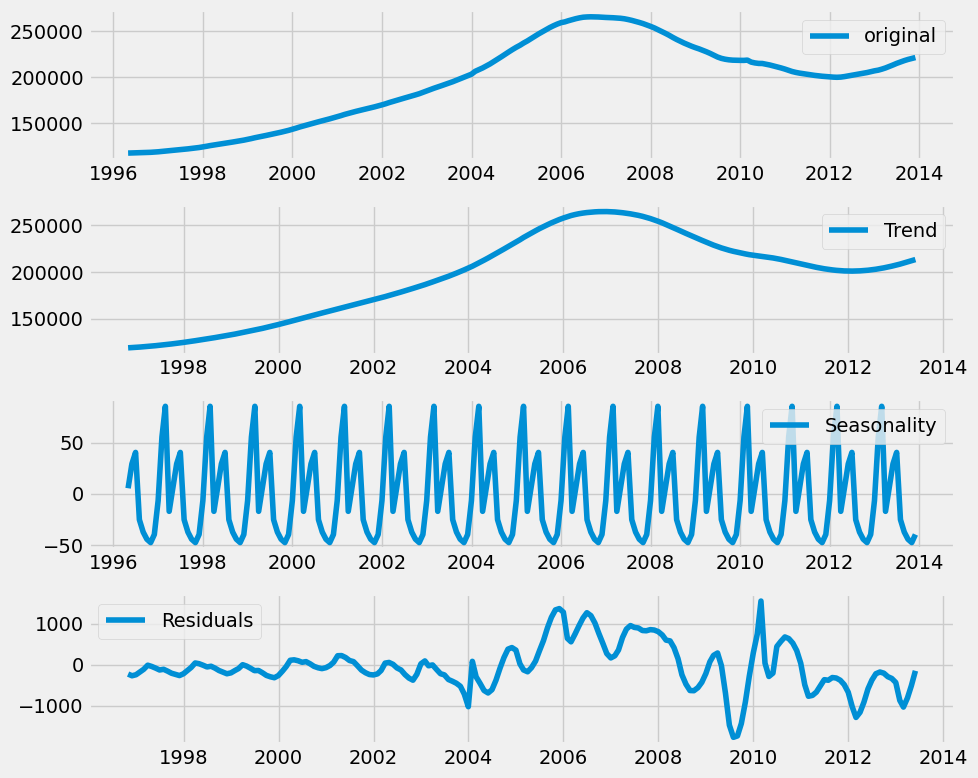

In [225]:
# Checking for trend, seasonality and residuals
decomposition = seasonal_decompose(train_set)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(figsize=(10,8), ncols=1,nrows=4)
axes[0].plot(train_set, label="original")
axes[1].plot(trend, label="Trend")
axes[2].plot(seasonal, label="Seasonality")
axes[3].plot(residual, label="Residuals")
[ax.legend() for ax in axes]
plt.tight_layout();

- This makes it easier to identify a changing mean or variation in the data. From the decomposition plot it clearly shows an upward trend in the series with seasonality and minimal variation. We will need to detrend the data because if seasonality and trend are part of the time series then there will be effects in the forecast value

### Stationarity Check

By computing the **rolling mean** and **rolling standard deviation**, this code aims to assess the stationarity of the series. Stationarity refers to the property of a time series where its statistical properties such as mean and variance remain constant over time. The rolling mean and standard deviation can help identify trends or patterns in the data and provide insights into its stationarity.

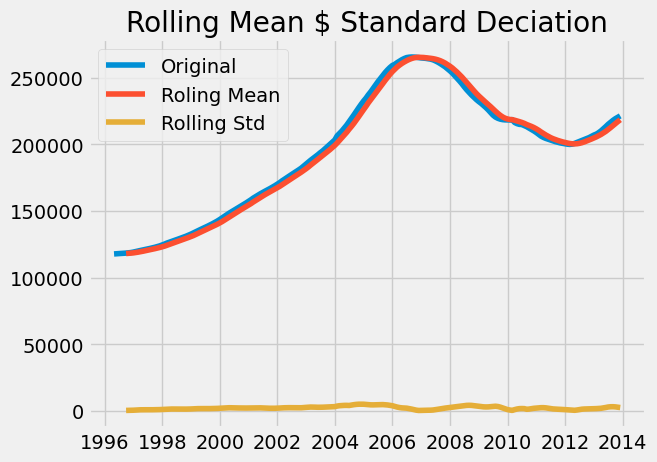

In [226]:
# Computing the rolling mean and rolling std
roll_mean = train_set.rolling(window=6).mean()
roll_std = train_set.rolling(window=6).std()

# Checking for stationarity
plt.plot(train_set, label="Original")
plt.plot(roll_mean, label="Roling Mean")
plt.plot(roll_std, label="Rolling Std")
plt.title("Rolling Mean $ Standard Deciation")
plt.legend();

- The data is non stationary because the original values, Rolling mean are not constant over time

The **Dickey-Fuller test** also helps in assessing the stationarity of the time series data. The test statistic, p-value, and critical values can provide insights into the presence of trends and seasonality in the data.

In [227]:
# The dickey-fuller test for stationarity
def stationarity_check(data):
    df_test = adfuller(data)
    print('Results of Dickey-Fuller Test: \n')
    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 
                                                '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
stationarity_check(train_set)

Results of Dickey-Fuller Test: 

Test Statistic                  -2.499718
p-value                          0.115543
#Lags Used                       2.000000
Number of Observations Used    209.000000
Critical Value (1%)             -3.462032
Critical Value (5%)             -2.875471
Critical Value (10%)            -2.574195
dtype: float64


- The $p$-$value = 0.3$ which is greater than the standard $\alpha = 0.05$ and hence fail to reject the $H_o$ and conlude that the series is not stationary.

### Detrending

There is trend and seasonality in the dataset and so we'll use differencing to detrend the data to remove them from the series.

In [228]:
# differencing by one year
data_diff = train_set.diff(periods=12).dropna()

# stationarity check
stationarity_check(data_diff)

Results of Dickey-Fuller Test: 

Test Statistic                  -1.867206
p-value                          0.347642
#Lags Used                      13.000000
Number of Observations Used    186.000000
Critical Value (1%)             -3.466005
Critical Value (5%)             -2.877208
Critical Value (10%)            -2.575122
dtype: float64


- $p$-$value > \alpha(0.05)$ hence still not stationary

In [229]:
# Differencing by two years
data_diff = train_set.diff(periods=24).dropna()

# stationarity check
stationarity_check(data_diff)

Results of Dickey-Fuller Test: 

Test Statistic                  -2.897153
p-value                          0.045680
#Lags Used                       2.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64


- $p$-$value = \alpha(0.05)$ hence fail to reject $H_O$. The data is not stationary.

In [230]:
# Differencing by four years
data_diff = train_set.diff(periods=48).dropna()

# stationarity check
stationarity_check(data_diff)

Results of Dickey-Fuller Test: 

Test Statistic                  -3.203766
p-value                          0.019768
#Lags Used                       2.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


- - $p$-$value < \alpha(0.05)$ hence reject $H_O$. The data is now stationary.

### Auto-correlation(ACF) and Partial Auto-correlation(PACF) plots

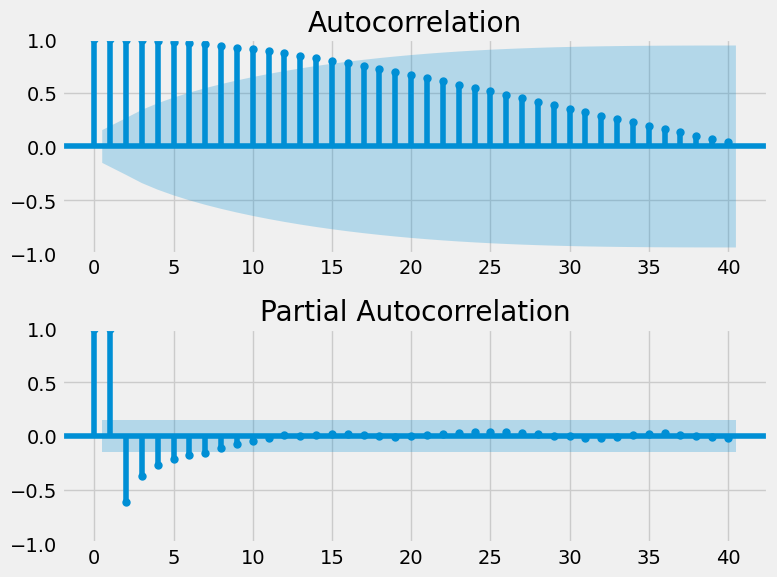

In [231]:
# plotting ACF nad PACF plots
fig, axes = plt.subplots(figsize=(8,6), nrows=2, ncols=1)
plot_acf(data_diff, ax=axes[0], lags=40)
plot_pacf(data_diff, ax=axes[1], lags=40)
plt.tight_layout();

- From the acf plot, lags between 1 and 14 are in the statistically significant region meaning time periods within that span can affect present values. The plot decays exponentially (tails off) suggesting the presence of a seasonal pattern and the presence of an autoregressive (AR) process.

- From the pacf plot it shows significant spikes at multiple lags but decays afterward, it suggests the presence of a mixed autoregressive-moving average (ARMA) process.

### Building Models

#### 1. AR(1) Model - Baseline Model

We built an AR(1) model as our baseline model then increase its complexity with more complex models.

In [232]:
from statsmodels.tsa.arima.model import ARIMA
# Fitting model
model_ar = ARIMA(data_diff, order=(1,0,0))
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      Median_HousePrice   No. Observations:                  164
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1488.019
Date:                Sat, 16 Sep 2023   AIC                           2982.037
Time:                        20:48:31   BIC                           2991.337
Sample:                    04-30-2000   HQIC                          2985.813
                         - 11-30-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.349e+04   6.71e+04      0.350      0.726   -1.08e+05    1.55e+05
ar.L1          0.9975      0.004    273.269      0.000       0.990       1.005
sigma2      4.322e+06   6115.124    706.833      0.0

#### 2. ARMA Model

In [233]:
# Fitting ARMA model
model_arma = ARIMA(data_diff, order=(1,0,1))
model_arma_fit = model_arma.fit()
print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      Median_HousePrice   No. Observations:                  164
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1398.508
Date:                Sat, 16 Sep 2023   AIC                           2805.015
Time:                        20:48:32   BIC                           2817.415
Sample:                    04-30-2000   HQIC                          2810.049
                         - 11-30-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.349e+04   6.04e+04      0.389      0.697   -9.49e+04    1.42e+05
ar.L1          0.9973      0.004    268.036      0.000       0.990       1.005
ma.L1          0.8649      0.037     23.509      0.0

#### 3. ARIMA Model

In [234]:
# Fitting ARIMA model
model_arima = ARIMA(data_diff, order=(1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      Median_HousePrice   No. Observations:                  164
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1308.717
Date:                Sat, 16 Sep 2023   AIC                           2623.433
Time:                        20:48:32   BIC                           2632.715
Sample:                    04-30-2000   HQIC                          2627.202
                         - 11-30-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9230      0.010     90.574      0.000       0.903       0.943
ma.L1         -0.4333      0.033    -13.203      0.000      -0.498      -0.369
sigma2      1.606e+05   8373.099     19.182      0.0

- Between AR(1),  ARMA(1,1), and ARIMA(1,1,1), ARIMA(1,1,1) has the lowest AIC AND BIC. Let's use auto arima to determine the best order.

#### 4. Auto-ARIMA

The AutoArima package performs a stepwise search to find the best parameters for an ARMA model based on the Akaike Information Criterion (AIC). It evaluates various combinations of AR and MA parameters, calculating the AIC for each model. The model with the lowest AIC is selected as the best-fit model. This approach balances model complexity and goodness of fit, avoiding overfitting or underfitting. The resulting model is considered the best based on AIC and can be used for analysis and forecasting.

In [235]:
# model = auto_arima(data_diff, start_p=0, start_q=0, d=None,
#                           information_criterion='aic', max_d=3, max_q=3,
#                           max_p=3, start_P=0, start_Q=0, D=None, max_P=3, max_Q=3,
#                           max_D=3, trace=True, stepwise=True 
                          
#                          )

model = pm.auto_arima(data_diff, seasonal=True, m=6, stepwise=True, trace=True)

print(model.summary())

# Get the best order (p, d, q) and seasonal order (P, D, Q, m)
best_order = model.order
best_seasonal_order = model.seasonal_order

print("Best ARIMA Order:", best_order)
print("Best Seasonal Order:", best_seasonal_order)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[6]             : AIC=inf, Time=2.53 sec
 ARIMA(0,2,0)(0,0,0)[6]             : AIC=2402.528, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[6]             : AIC=2406.024, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[6]             : AIC=2406.111, Time=0.06 sec
 ARIMA(0,2,0)(1,0,0)[6]             : AIC=2404.511, Time=0.39 sec
 ARIMA(0,2,0)(0,0,1)[6]             : AIC=2404.512, Time=0.15 sec
 ARIMA(0,2,0)(1,0,1)[6]             : AIC=inf, Time=1.12 sec
 ARIMA(1,2,0)(0,0,0)[6]             : AIC=2404.035, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[6]             : AIC=2404.072, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[6]             : AIC=2405.766, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[6] intercept   : AIC=2404.527, Time=0.04 sec

Best model:  ARIMA(0,2,0)(0,0,0)[6]          
Total fit time: 5.209 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  164
Model:

- Based on the results of the AutoArima model search, the selected model with parameters (0, 2, 0) and a reduced AIC value of 2402.528 appears to be a good fit for the data.

#### 5. SARIMA Model

In [236]:
import pmdarima as pm
#using auto_arima- it does a random search for the best pdq,PDQS  
sarima_model = pm.auto_arima(data_diff, m=12, seasonal=True, start_p=0, start_q=0,
                             start_P=0, start_Q=0, max_order=6,  test="adf", error_action="warn",  
                             suppress_warnings=True, stepwise=True, trace=False)
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  164
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1214.356
Date:                Sat, 16 Sep 2023   AIC                           2438.713
Time:                        20:49:20   BIC                           2454.212
Sample:                    04-30-2000   HQIC                          2445.005
                         - 11-30-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     44.8229     34.303      1.307      0.191     -22.411     112.056
ar.L1          1.9789      0.013    151.249      0.000       1.953       2.005
ar.L2         -0.9808      0.013    -75.388      0.000      -1.006      -0.955
ma.L1         -0.1214      0.052     -2.355      0.019      -0.222      -0.020
sigma2      1.465e+05   7811.222     18.759      0.000    1.31e+05    1.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1525.57
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.89   Skew:                            -2.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- The AIC value of 2438.713 and BIC value, 2454.212, indicates a worse fit compared to the Auto-Arima model. Let's tune the model to see if there will be improvements. 

#### SARIMA (tuned)

In [237]:
#Iterate through potential pdq values for total dataset
# Define the p, d and q parameters to take any value between 0 a
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
best = []
for combo in pdq:    
    for combos in pdqs:
        try:
            s_model = sm.tsa.statespace.SARIMAX(data_diff,
                                            order=combo,
                                            seasonal_order=combos,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            output = s_model.fit()
            best.append([combo, combos, output.aic])
           
        except:
            continue

In [239]:
param_df = pd.DataFrame(best, columns=["pdq","pdqs", "aic"])
best_params = param_df.loc[param_df["aic"].idxmin()]
print(best_params)

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic       2079.977189
Name: 63, dtype: object


In [240]:

sarima_model_2 = sm.tsa.statespace.SARIMAX(data_diff,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

sarima_results = sarima_model_2.fit()

sarima_results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14208D+00    |proj g|=  1.16522D-01

At iterate    5    f=  5.76419D+00    |proj g|=  2.61409D-01

At iterate   10    f=  5.43383D+00    |proj g|=  3.70316D+00

At iterate   15    f=  5.22012D+00    |proj g|=  5.77298D-01

At iterate   20    f=  5.18982D+00    |proj g|=  9.65493D-02

At iterate   25    f=  5.17316D+00    |proj g|=  4.62301D-01

At iterate   30    f=  5.16044D+00    |proj g|=  9.25447D-02

At iterate   35    f=  5.15312D+00    |proj g|=  8.93429D-02

At iterate   40    f=  5.15098D+00    |proj g|=  6.02195D-02

At iterate   45    f=  5.14999D+00    |proj g|=  1.10362D-01

At iterate   50    f=  5.14861D+00    |proj g|=  3.41206D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Median_HousePrice   No. Observations:                  164
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood                -844.371
Date:                            Sat, 16 Sep 2023   AIC                           1714.743
Time:                                    20:49:51   BIC                           1749.967
Sample:                                04-30-2000   HQIC                          1729.032
                                     - 11-30-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3109      1.828      0.717      0.473      -2.272       4.893
ar.L2          0.3566      3.632      0.098      0.922      -6.763       7.476
ar.L3         -0.6738      1.812     -0.372      0.710      -4.226       2.878
ma.L1         -0.4069      1.848     -0.220      0.826      -4.029       3.215
ma.L2         -0.6577      1.927     -0.341      0.733      -4.435       3.120
ma.L3          0.0956      0.192      0.498      0.618      -0.280       0.471
ar.S.L12      -0.4350      0.591     -0.736      0.462      -1.594       0.724
ar.S.L24       0.0345      0.489      0.071      0.944      -0.923       0.992
ar.S.L36      -0.0178      0.142     -0.125      0.900      -0.297       0.261
ma.S.L12      -0.3499      0.629     -0.557      0.578      -1.582       0.882
ma.S.L24      -0.4921      0.563     -0.874      0.382      -1.595       0.611
ma.S.L36       0.1490      0.454      0.329      0.743      -0.740       1.038
sigma2      3.194e+05    6.4e-06   4.99e+10      0.000    3.19e+05    3.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               515.73
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -1.67
Prob(H) (two-sided):                  0.40   Kurtosis:                        13.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.19e+27. Standard errors may be unstable.
"""

- After getting the best parameters from a range between 0 to 4 the best parameters were found to be (3,1,3). After tuning the SARIMA model obtained the lowest AIC value of 1714.743 which indicates a better fit of the model to the data.

In [241]:
all_data = long_df["Median_HousePrice"].resample("M").mean()
data_diff_all = all_data.diff(periods=24).dropna()
sarima_model_2 = sm.tsa.statespace.SARIMAX(data_diff_all,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

sarima_results_all = sarima_model_2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97521D+00    |proj g|=  3.80674D-01


 This problem is unconstrained.



At iterate    5    f=  5.87170D+00    |proj g|=  5.19440D-01

At iterate   10    f=  5.84837D+00    |proj g|=  3.37662D-01

At iterate   15    f=  5.84106D+00    |proj g|=  2.34818D-02

At iterate   20    f=  5.83763D+00    |proj g|=  5.21613D-01

At iterate   25    f=  5.83594D+00    |proj g|=  3.08588D-02

At iterate   30    f=  5.83468D+00    |proj g|=  1.49524D-02

At iterate   35    f=  5.83459D+00    |proj g|=  4.26106D-03

At iterate   40    f=  5.83454D+00    |proj g|=  2.08159D-02

At iterate   45    f=  5.83449D+00    |proj g|=  2.30817D-02

At iterate   50    f=  5.83445D+00    |proj g|=  2.31639D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

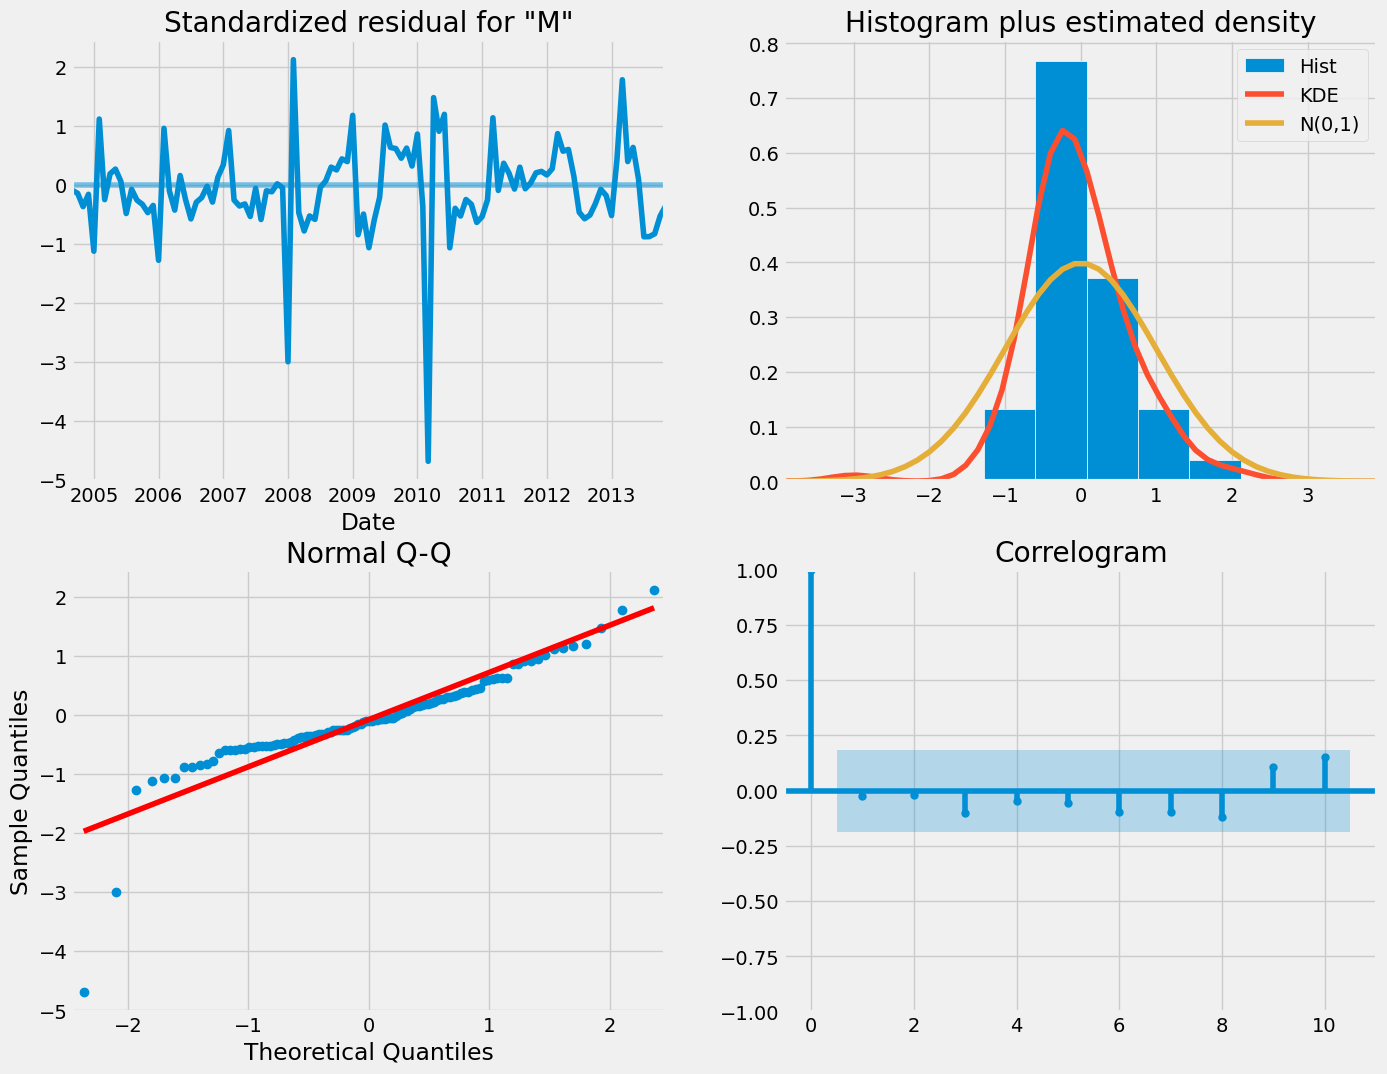

In [242]:
# Model Diagnostics
sarima_results.plot_diagnostics(figsize=(15,12));

SARIMA (tuned) model shows improvement compared to the previous models.
Based on the following observations from the diagnostics above the model is retained.
- Lower AIC value indicating a better fit.
- No correlation in the residuals. This suggests it captures underlying patterns effectively.
- Q-Q plot indicates residuals are taken from a N(0,1) distribution.
- Histogram of residuals shows a mean of 0, indicating unbiased predictions.

### Model Evaluation and Performance

We compare predicted values to real values of the time series, which will help us understand the accuracy of our forecasts

#### Non dynamic forecast

**non-dynamic forecast** refers to a type of forecasting where the model's predictions for future time periods are not updated or revised as new actual data becomes available. In other words, once the forecast is generated, it remains fixed and does not adapt or change based on incoming information.

In [243]:
pred = sarima_results.get_prediction(start=pd.to_datetime("2010-01-31"), dynamic=False)
pred_ci = pred.conf_int()

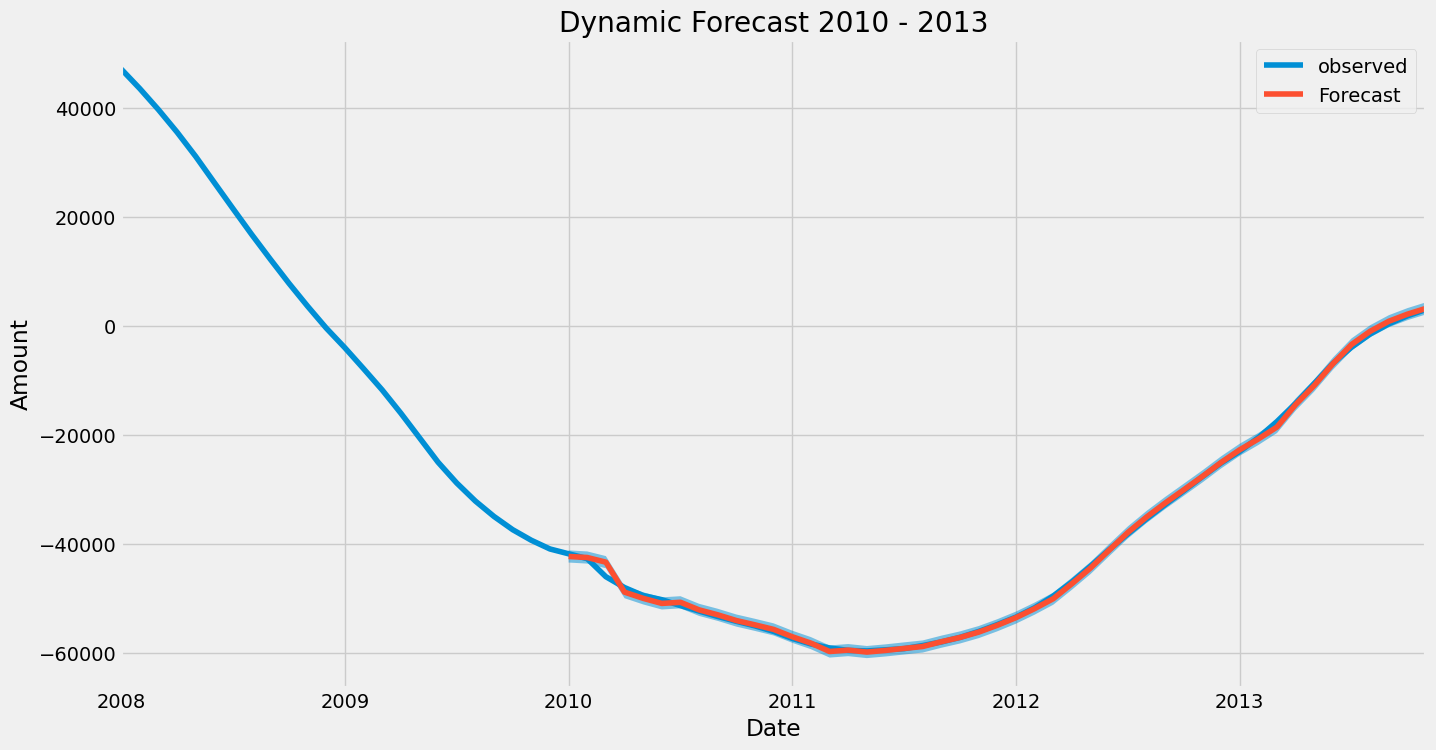

In [244]:
# Plotting predicted values against truevalues
plt.figure(figsize = (15,8))
ax = data_diff["2008":].plot(label="observed")
pred.predicted_mean.plot(ax=ax, label="Forecast")

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=0.5)

ax.set_title("Dynamic Forecast 2010 - 2013")
ax.set_xlabel("Date")
ax.set_ylabel("Amount")
plt.legend()

plt.show()

- THe plot shows the non-dynamic forecast from 2010 to 2013, comparing the predicted values (labeled as "Forecast") to the observed values of the time series. The shaded area represents the confidence interval for the forecasts.

In [245]:
# Evaluating
y_forecasted1 = pred.predicted_mean
y_truth1 = data_diff["2010-01-31":]
mean_absolute_percentage_error(y_truth1, y_forecasted1)

0.050487820201114836

In [246]:
# RMSE
mean_squared_error(y_forecasted1, y_truth1, squared=False)

529.1457373527612

- The mean absolute percentage error (MAPE) value of 0.0505 indicates that, on average, the forecasted values from the non-dynamic SARIMA model have an absolute percentage error of approximately 5%. This means that the forecasted values deviate from the actual values by around 5% on average and RMSE of 529.14.

#### Dynamic Forecast

**Dynamic forecasting**, also known as rolling forecasting or real-time forecasting, refers to a method of making predictions for future values in a time series by continually updating the forecast as new data becomes available. Unlike static or non-dynamic forecasting, which generates fixed forecasts that do not change over time, dynamic forecasting is adaptive and responsive to changes in the underlying data.

In [247]:
pred_dynamic = sarima_results.get_prediction(start=pd.to_datetime("2010-01-31"), dynamic=True)
pred_ci_dynamic = pred.conf_int()

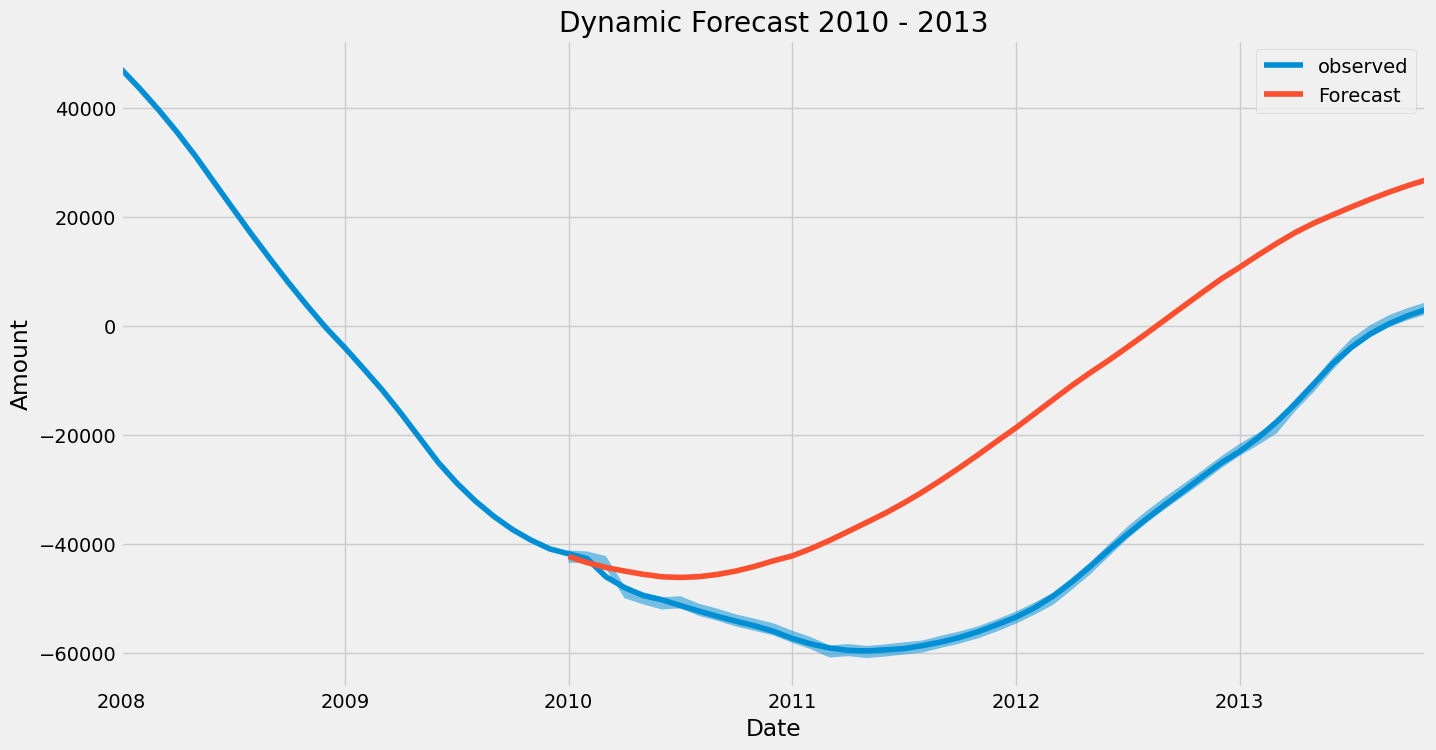

In [248]:
plt.figure(figsize = (15,8))
ax = data_diff["2008":].plot(label="observed")
pred_dynamic.predicted_mean.plot(ax=ax, label="Forecast")

ax.fill_between(pred_ci_dynamic.index,
                pred_ci_dynamic.iloc[:, 0],
                pred_ci_dynamic.iloc[:, 1], alpha=0.5)

ax.set_title("Dynamic Forecast 2010 - 2013")
ax.set_xlabel("Date")
ax.set_ylabel("Amount")
plt.legend()

plt.show()

In [249]:
# Evaluating
y_forecasted2 = pred_dynamic.predicted_mean
y_truth2 = data_diff["2010-01-31":]
mean_absolute_percentage_error(y_truth2, y_forecasted2)

3.0111414449329588

In [250]:
# RMSE
mean_squared_error(y_forecasted2, y_truth2, squared=False)

26101.666184315945

- The mean absolute percentage error (MAPE) between the forecasted values and the actual values for the dynamic forecast is 3.011, indicating a higher error rate compared to the non-dynamic forecast.

- Also the RMSE is 26101.66 higher than the non-dynamic model

#### Future Prediction

In [251]:
# prediction 3 years into the future
pred_uc = sarima_results_all.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()

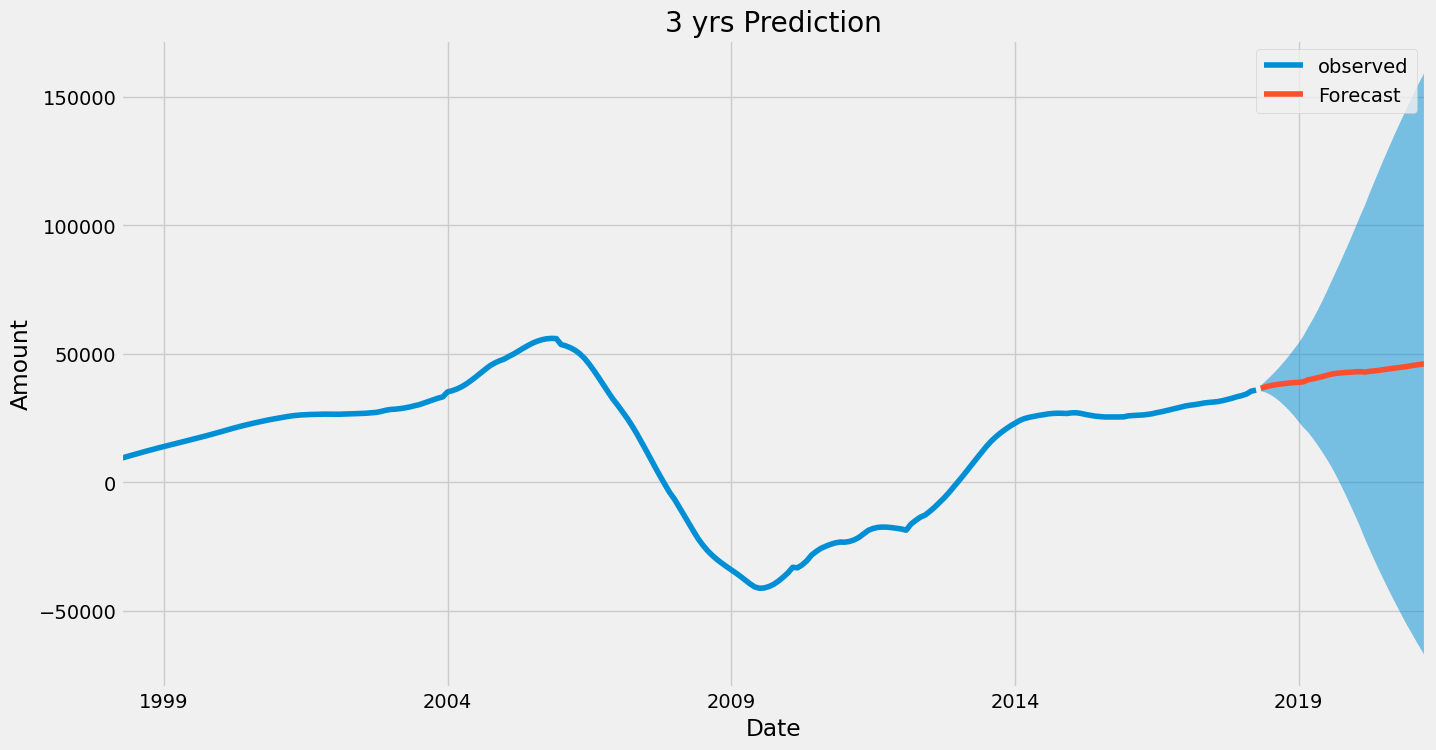

In [252]:
ax = data_diff_all.plot(label="observed", figsize=(15, 8))
pred_uc.predicted_mean.plot(ax=ax, label="Forecast")
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=0.5)
ax.set_xlabel("Date")
ax.set_ylabel("Amount")
ax.set_title("3 yrs Prediction")

plt.legend()
plt.show()

- The model predicts an upward trend for the next three years. This shows that price will continue to rise but by a slow rate.

## Conclusion

- After few iterations and model tuning the model was able to achieve low AIC and BIC values which were 1714.743 and 1749.967 respectively. This low values indicates a better model that had a good fit.

- Mean Absolute Percentage Error was also used as an evaluetion metric of the non dynamic and dynamic forecasting. Non-Dynamic forecating had a better MAPE of 0.0505 indicating that, on average, the forecasted values from the non-dynamic SARIMA model have an absolute percentage error of approximately 5%. This means that the forecasted values deviate from the actual values by around 5% on average.

- Through ROI and CV we were able to get the topfive zipcodes with a high ROI and low CV as when making investment decisions you should balance your risk-return trade-off by considering both ROI (return potential) and CV (risk). This cities were also selected considering the positive correlation between ROI and CV which means that the higher risk the higher the Return on Investment (ROI). 

## Recommendations
- The company should invest in three cities newyork, Sea Island, and Kilauea which had the highest ROI and low CV with specific zipcodes being; ``New York;`` 10021, 10014, 11217, ``Sea Island;`` 31561  ``Kilauea;`` 96714. New york potentially being the most profitable, as the predictions are that the price will slightly increase in the future.

- The city Atherton should be looked into carefully due to the high price volatility and low returns.

- The risk is abit high but considering how high the return on investment is and the positive correlation between the risk and return, including also the increase in price in the the future predictions then these locations are preferrable.

- Other factors like amenities, infrustructure development, urbanization of the cities should be looked into as this could also majorly have a big effect on the house prices. 